In [1]:
!pip install gdown
!pip install sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
# ---download libraries and files---#

import pandas as pd
import numpy as np
from google.colab import drive

import gdown

file_id = '1K2KYziMIVZjZJqqVbyg4CGEKSSRfrf-k'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'Original_DB.csv', quiet=False)
df_visualization = pd.read_csv('Original_DB.csv')

file_id = '1KB6K-L_rgMjXZESqrCBauHdEv__IRG1N'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'bert_preprocess.csv', quiet=False)
df_sample = pd.read_csv('bert_preprocess.csv', sep=',', nrows=100)

cols_to_load = [col for col in df_sample.columns if not col.startswith('lyric_emb_')]
cleaned_df = pd.read_csv('bert_preprocess.csv', sep=',', usecols=cols_to_load)

embedding_cols = [col for col in df_sample.columns if col.startswith('lyric_emb_')]
embeddings_df = pd.read_csv('bert_preprocess.csv', usecols=embedding_cols)


Downloading...
From (original): https://drive.google.com/uc?id=1K2KYziMIVZjZJqqVbyg4CGEKSSRfrf-k
From (redirected): https://drive.google.com/uc?id=1K2KYziMIVZjZJqqVbyg4CGEKSSRfrf-k&confirm=t&uuid=d8a62a78-c9c8-4ac0-bd7b-d4ea78c76144
To: /content/Original_DB.csv
100%|██████████| 1.01G/1.01G [00:13<00:00, 73.1MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1KB6K-L_rgMjXZESqrCBauHdEv__IRG1N
From (redirected): https://drive.google.com/uc?id=1KB6K-L_rgMjXZESqrCBauHdEv__IRG1N&confirm=t&uuid=7b119c26-d5ad-4546-9791-9212af6a20f4
To: /content/bert_preprocess.csv
100%|██████████| 3.38G/3.38G [00:31<00:00, 107MB/s] 


<ipython-input-20-a7247b83d948>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_counts.index, x=genre_counts.values, ax=ax, palette="viridis")


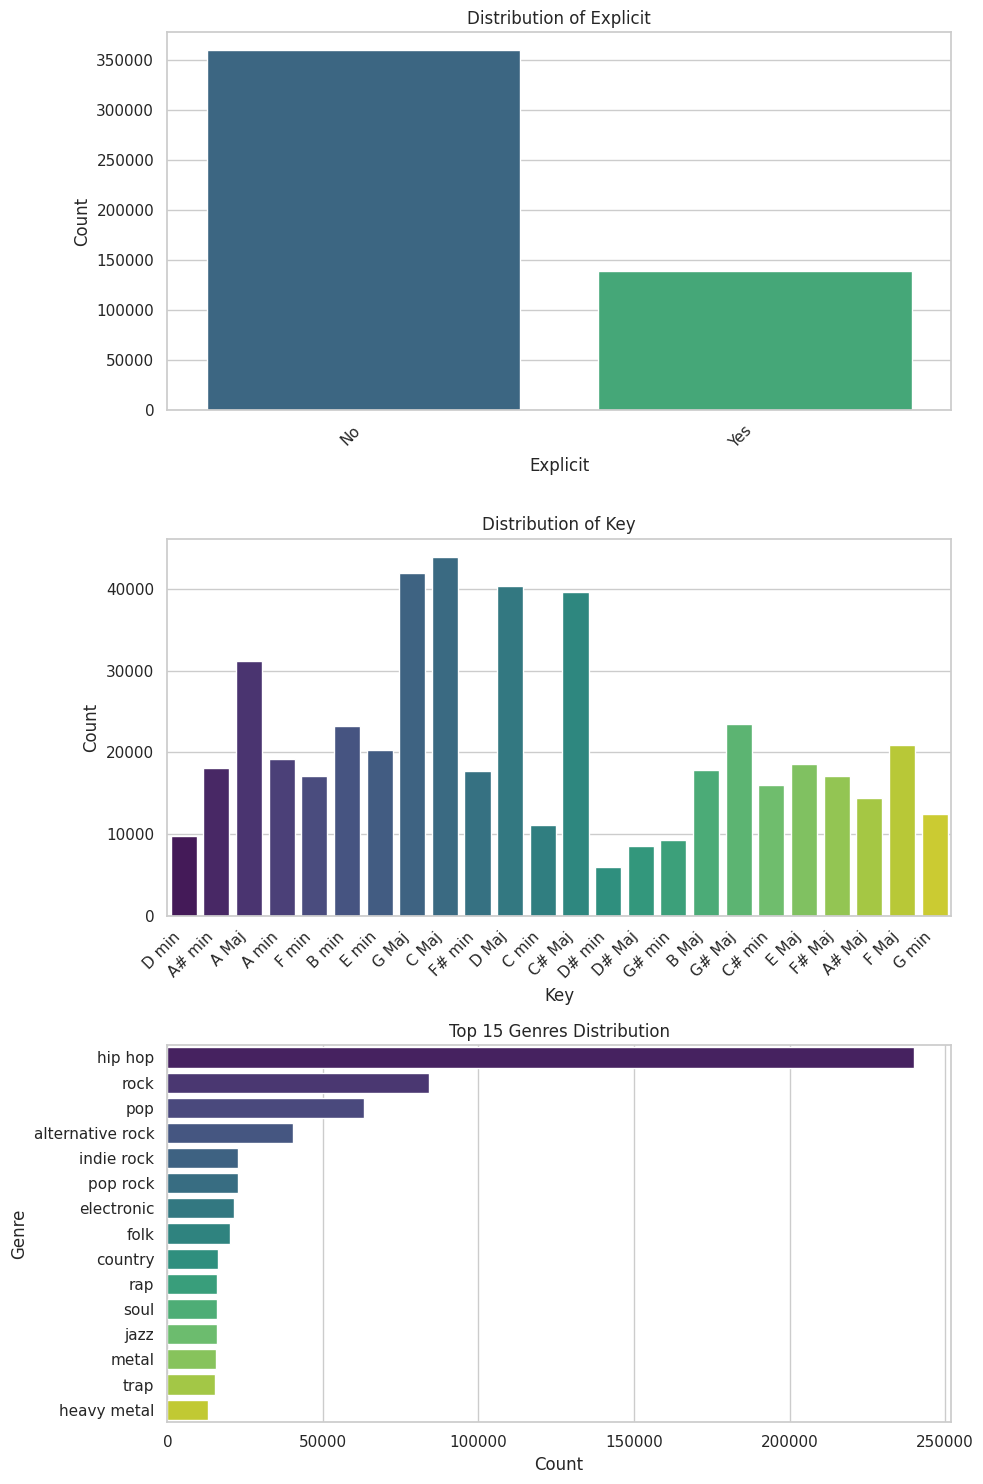

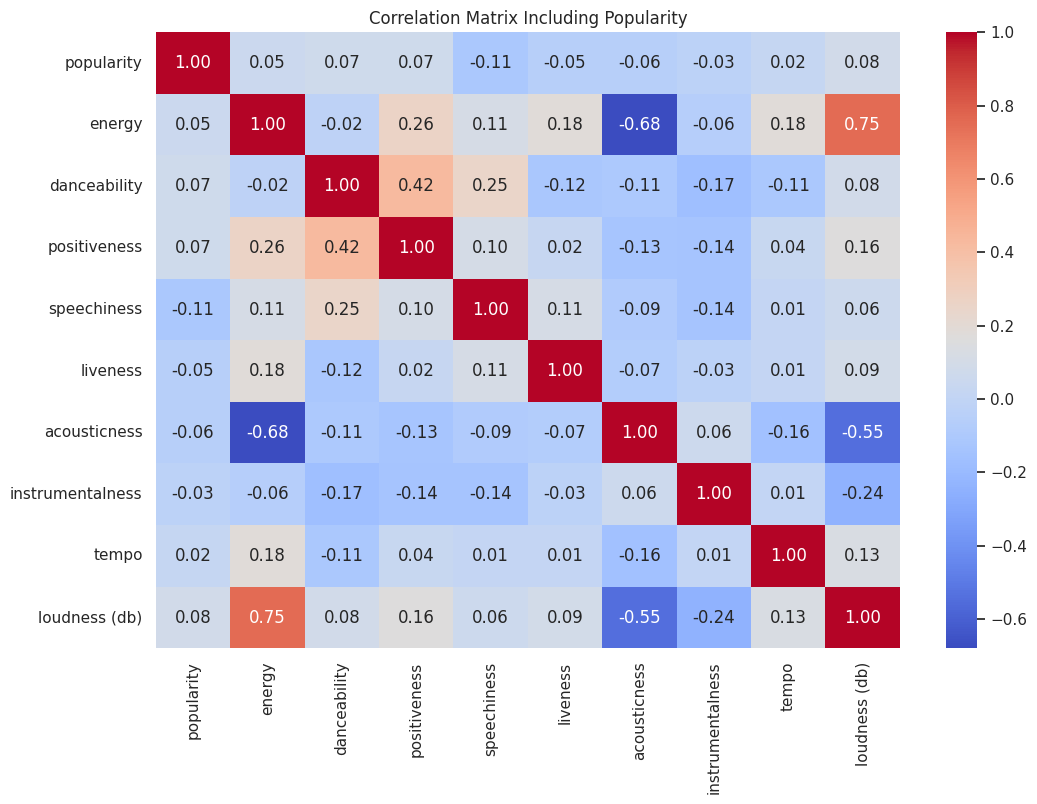

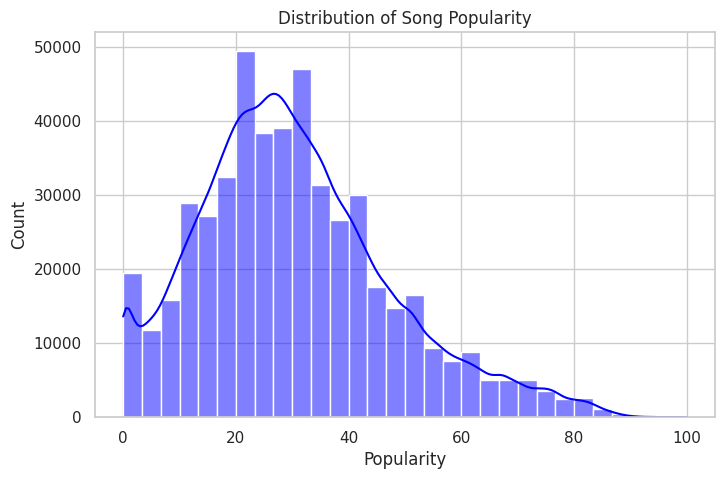

In [ ]:
#----visualization part----#

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set plot style
sns.set(style="whitegrid")

# Change the column names to lower case
df_visualization.columns = df_visualization.columns.str.lower()

# Define raw categorical columns
categorical_cols = ['explicit', 'key', 'genre']

# Create a figure for categorical data visualization
fig, axes = plt.subplots(nrows=len(categorical_cols), figsize=(10, 5 * len(categorical_cols)))

for i, col in enumerate(categorical_cols):
    ax = axes[i] if len(categorical_cols) > 1 else axes

    # Handle genre separately due to multiple values per row
    if col == 'genre':
        # Split the genre combinations into separate genres and flatten the list
        genre_list = df_visualization['genre'].dropna().str.split(',').explode().str.strip()

        # Get the top 15 genres by frequency
        genre_counts = genre_list.value_counts().nlargest(15)

        # Plot the top 15 genres
        sns.barplot(y=genre_counts.index, x=genre_counts.values, ax=ax, palette="viridis")
        ax.set_title("Top 15 Genres Distribution")
        ax.set_xlabel("Count")
        ax.set_ylabel("Genre")

    else:
        # Plot for other categorical columns with rotated x-axis labels
        sns.countplot(data=df_visualization, x=col, ax=ax, hue=col, palette="viridis")
        ax.set_title(f"Distribution of {col.capitalize()}")
        ax.set_xlabel(col.capitalize())
        ax.set_ylabel("Count")

        # Fix the rotation issue for x-axis labels
        ax.set_xticks(range(len(ax.get_xticklabels())))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Define the numerical columns including popularity
numerical_cols = [
    'popularity', 'energy', 'danceability', 'positiveness', 'speechiness',
    'liveness', 'acousticness', 'instrumentalness', 'tempo', 'loudness (db)'
]

# 1. Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df_visualization[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Including Popularity")
plt.show()

# 2. Distribution of Song Popularity
plt.figure(figsize=(8, 5))
sns.histplot(df_visualization['popularity'], bins=30, kde=True, color="blue")
plt.title("Distribution of Song Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()




### **Planned Data Cleaning and Preprocessing Steps**

1. **Column Normalization**
   We will convert all column names to lowercase to ensure consistency and avoid case-related errors when accessing columns programmatically.

2. **Missing Label Filtering**
   We will remove rows with missing values in the target column `popularity`, since incomplete labels are not useful for training supervised learning models.

3. **Irrelevant Feature Removal**
   We plan to drop columns that are not relevant to our classification objective (such as "similar artist 1", "good for running", etc.) in order to simplify the model and avoid overfitting.

4. **Genre Parsing**
   We will preprocess the `genre` column, which often contains multiple comma-separated genres, by splitting, exploding, and stripping these entries. This will allow for more accurate analysis and feature encoding.

5. **Categorical Column Identification**
   We will identify and isolate categorical features (`explicit`, `key`, `genre`) for encoding and visualization.

6. **Exploratory Visualization**
   We will visualize the distribution of categorical features and plot a correlation matrix of numerical features.

   **Preliminary Observations from Visualizations**:

   * The `genre` distribution is highly imbalanced. The most dominant genre is **hip hop**, significantly more frequent than other genres in the dataset. This could introduce bias if not handled properly during classification.
   * The `key` feature shows uneven distribution, with certain musical keys appearing far more often than others. This might reflect production trends but may not be strongly informative for predicting popularity.
   * The `explicit` feature is skewed toward non-explicit songs, which could influence model performance if the label distribution is correlated.
   * The heatmap reveals strong positive correlations between `energy`, `danceability`, and `loudness (db)` with `popularity`, implying that high-energy, loud, and danceable songs are more likely to be popular.
   * The popularity distribution is highly imbalanced, with a large concentration of songs at lower popularity scores. This indicates the need to either binarize the target or apply techniques like resampling to address class imbalance during classification.

In [ ]:
#---Pre-Proccessing---#


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


#droping null cols in the label colimn
df.dropna(subset=['popularity'])
#irellavent columns for the classification mission
drop_cols = [
    'similar artist 1', 'similar song 1', 'similarity score 1',
    'similar artist 2', 'similar song 2', 'similarity score 2',
    'similar artist 3', 'similar song 3', 'similarity score 3',
    'good for party', 'good for work/study', 'good for relaxation/meditation',
    'good for exercise', 'good for running', 'good for yoga/stretching',
    'good for driving', 'good for social gatherings', 'good for morning routine',
    'length', 'album', 'release date','song','artist(s)'
]
cleaned_df = df.drop(columns=drop_cols)


#remove duplicates
cleaned_df = cleaned_df.drop_duplicates()
#map for keys
key_map = {
    'C': 0, 'C#': 1, 'D': 2, 'D#': 3, 'E': 4, 'F': 5,
    'F#': 6, 'G': 7, 'G#': 8, 'A': 9, 'A#': 10, 'B': 11
}
def convert_key(key):
    try:
        note, scale = key.split()
        note_value = key_map[note]
        scale_value = 1 if scale == 'Maj' else 0
        return note_value + (12 * scale_value)
    except:
        return np.nan




NameError: name 'df' is not defined

In [ ]:
#---Pre-Proccessing---#

# Step 1: Split the genre combinations into separate genres
# Removing NaN values for safety
cleaned_df['genre'] = cleaned_df['genre'].fillna('')

# Split genre strings and explode into individual rows for counting unique genres
unique_genres = set([genre.strip() for genres in cleaned_df['genre'].str.split(',') for genre in genres if genre])

# Step 2: Initialize a DataFrame with zeros for each unique genre
for genre in unique_genres:
    cleaned_df[genre] = 0

# Step 3: Set the appropriate genre columns to 1 where applicable
for index, row in cleaned_df.iterrows():
    genre_list = str(row['genre']).split(',')
    for genre in genre_list:
        genre = genre.strip()  # Remove extra spaces
        if genre in unique_genres:
            cleaned_df.at[index, genre] = 1

cleaned_df.drop(columns=['genre'], inplace=True)




<ipython-input-6-97e88ae4b56c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['genre'] = cleaned_df['genre'].fillna('')


In [ ]:
#---Pre-Proccessing---#

#proving that the time signature column does not contribute to the data set because 91% of the data is 4/4 so we could drop this column
print(cleaned_df['time signature'].value_counts(normalize=True))
cleaned_df.drop(columns = ['time signature'])


cleaned_df['key_numeric'] = cleaned_df['key'].apply(convert_key)
cleaned_df.drop(columns=['key'], inplace=True)

#encode ccategorial columns into numerical values
label_encoder = LabelEncoder()

# explicit: Yes -> 1, No -> 0
cleaned_df['explicit'] = cleaned_df['explicit'].map({'Yes': 1, 'No': 0})

# emotion: Label Encoding
cleaned_df['emotion'] = label_encoder.fit_transform(cleaned_df['emotion'].astype(str))




#standartization
numerical_cols = cleaned_df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = [col for col in numerical_cols if col != 'popularity']

scaler = StandardScaler()
cleaned_df[numerical_cols] = scaler.fit_transform(cleaned_df[numerical_cols])


time signature
4/4    0.906572
3/4    0.069483
5/4    0.017161
1/4    0.006783
Name: proportion, dtype: float64


In [ ]:
#---Pre-Proccessing---#

from sentence_transformers import SentenceTransformer
from tqdm import tqdm

# Load the model once
model = SentenceTransformer('all-MiniLM-L6-v2')

# Make sure no NaNs in text
cleaned_df['text'] = cleaned_df['text'].fillna('')

# Set batch size based on memory (adjust as needed)
batch_size = 1000

# Container for the embeddings
all_embeddings = []

# Generate embeddings in batches
print("Encoding lyrics in batches...")
for start in tqdm(range(0, len(cleaned_df), batch_size)):
    end = start + batch_size
    batch_texts = cleaned_df['text'].iloc[start:end].tolist()
    batch_embeddings = model.encode(batch_texts, show_progress_bar=False)
    all_embeddings.append(batch_embeddings)

# Combine all batches into one array
lyric_embeddings = np.vstack(all_embeddings)

# Convert to DataFrame and merge
lyric_df = pd.DataFrame(lyric_embeddings, columns=[f'lyric_emb_{i}' for i in range(lyric_embeddings.shape[1])])
cleaned_df = pd.concat([cleaned_df.reset_index(drop=True), lyric_df], axis=1)

# Drop original text to save memory
cleaned_df = cleaned_df.drop(columns=['text'])

# Confirm result
print(f"Updated DataFrame shape: {cleaned_df.shape}")





Encoding lyrics in batches...


100%|██████████| 498/498 [26:26<00:00,  3.19s/it]


Updated DataFrame shape: (497997, 486)


In [ ]:
#---Pre-Proccessing---#

#not used#

from imblearn.over_sampling import SMOTE
from sklearn.utils import resample



vc = cleaned_df['popularity'].value_counts()
valid_classes = vc[vc >= 6].index
filtered_df = cleaned_df[cleaned_df['popularity'].isin(valid_classes)]

X_for_smote = filtered_df.drop(columns=['popularity'])

if 'text_vector' in X_for_smote.columns:
    X_for_smote = X_for_smote.drop(columns=['text_vector'])

non_numeric_cols = X_for_smote.select_dtypes(include='object').columns
X_for_smote = X_for_smote.drop(columns=non_numeric_cols)

y = filtered_df['popularity']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_for_smote, y)

balanced_df = pd.concat([
    pd.DataFrame(X_resampled, columns=X_for_smote.columns),
    pd.Series(y_resampled, name='popularity')
], axis=1)

print("SMOTE successful. New shape:", balanced_df.shape)
print("Class distribution after SMOTE:\n", balanced_df['popularity'].value_counts())


### 1️⃣ Feature Engineering, Selection, and SMOTE
We started by carefully preparing the dataset, cleaning missing values, encoding categorical variables, and scaling numerical values. We engineered domain-specific features (like `loudness_per_energy`, `danceability_energy`, `speech_vs_positive`) and aggregated the lyric embeddings (mean, max, min, std) to reduce dimensionality.

To address the strong imbalance in popularity classes, we applied SMOTE (Synthetic Minority Over-sampling Technique), which ensured that underrepresented classes had sufficient weight for learning. This preprocessing stage was crucial to prevent bias toward dominant classes and to give the model balanced exposure across categories.



In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from imblearn.over_sampling import SMOTE

# Load preprocessed main data (without embeddings)
df_sample = pd.read_csv('bert_preprocess.csv', nrows=5)
cols_to_load = [col for col in df_sample.columns if not col.startswith('lyric_emb_')]
cleaned_df = pd.read_csv('bert_preprocess.csv', usecols=cols_to_load)

# Load embeddings separately
embedding_cols = [col for col in df_sample.columns if col.startswith('lyric_emb_')]
embeddings_df = pd.read_csv('bert_preprocess.csv', usecols=embedding_cols)

# Merge embeddings into cleaned_df
cleaned_df = pd.concat([cleaned_df, embeddings_df], axis=1)

sampled_df = cleaned_df.sample(n=100000, random_state=42) if len(cleaned_df) > 100000 else cleaned_df.copy()

# --- Feature Engineering & Selection (Reduced) --- #
def feature_engineering_selection(df, label_col='popularity', top_k=50):
    ε = 1e-6
    loudness_col = 'loudness (db)'
    energy_col = 'energy'
    danceability_col = 'danceability'
    positiveness_col = 'positiveness'
    acousticness_col = 'acousticness'

    if loudness_col in df.columns and energy_col in df.columns:
        df['loudness_per_energy'] = df[loudness_col] / (df[energy_col] + ε)
    if danceability_col in df.columns and energy_col in df.columns:
        df['danceability_energy'] = df[danceability_col] * df[energy_col]
    if 'speechiness' in df.columns and positiveness_col in df.columns:
        df['speech_vs_positive'] = df['speechiness'] / (df[positiveness_col] + ε)
    if acousticness_col in df.columns:
        df['is_acoustic'] = (df[acousticness_col] > 0.8).astype(int)

    emb_cols = [c for c in df.columns if c.startswith('lyric_emb_')]
    if emb_cols:
        emb_matrix = df[emb_cols].values
        df['emb_mean'] = emb_matrix.mean(axis=1)
        df['emb_std'] = emb_matrix.std(axis=1)
        df['emb_min'] = emb_matrix.min(axis=1)
        df['emb_max'] = emb_matrix.max(axis=1)

    reduced_feature_cols = [
        'loudness_per_energy', 'danceability_energy', 'speech_vs_positive', 'is_acoustic',
        'emb_mean', 'emb_std', 'emb_min', 'emb_max'
    ]
    reduced_feature_cols = [col for col in reduced_feature_cols if col in df.columns]

    X = df[reduced_feature_cols].fillna(0)
    y = df[label_col]

    if len(reduced_feature_cols) < top_k:
        selected_features = reduced_feature_cols
    else:
        info_scores = mutual_info_regression(X, y)
        top_indices = np.argsort(info_scores)[-top_k:]
        selected_features = [reduced_feature_cols[i] for i in top_indices]

    final_cols = [col for col in selected_features + [label_col] if col in df.columns]
    return df[final_cols], selected_features

features_df, selected_features = feature_engineering_selection(sampled_df)

# --- SMOTE Balancing --- #
vc = features_df['popularity'].value_counts()
valid_classes = vc[vc >= 6].index
filtered_df = features_df[features_df['popularity'].isin(valid_classes)]

X_for_smote = filtered_df.drop(columns=['popularity'])
y = filtered_df['popularity']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_for_smote, y)

balanced_df = pd.concat([
    pd.DataFrame(X_resampled, columns=X_for_smote.columns),
    pd.Series(y_resampled, name='popularity')
], axis=1)

print("Pipeline complete. Final balanced DataFrame shape:", balanced_df.shape)
print("Class distribution after SMOTE:\n", balanced_df['popularity'].value_counts())



Pipeline complete. Final balanced DataFrame shape: (246284, 9)
Class distribution after SMOTE:
 popularity
17    2677
55    2677
23    2677
40    2677
43    2677
      ... 
87    2677
88    2677
86    2677
91    2677
89    2677
Name: count, Length: 92, dtype: int64


### 2️⃣ Important Features, RandomForest Baseline, Category Splitting
We evaluated the importance of the engineered features using RandomForest classifiers, starting with smaller models to quickly explore performance patterns. We divided the target into binary groups (low vs high popularity) after observing that the medium class was less stable and less critical for decision making.

The RandomForest models revealed which features most strongly influenced predictions — notably, audio-energy relationships and embedding aggregations. These insights guided the decision to focus on a stronger, boosting-based model.


New popularity groups:
popularity_group
low       82987
high      82987
medium    80310
Name: count, dtype: int64
Training RandomForest for feature importance...
Top 10 important features:
               feature  importance
1  danceability_energy    0.199558
0  loudness_per_energy    0.160487
2   speech_vs_positive    0.154388
5              emb_std    0.115244
4             emb_mean    0.105237
7              emb_max    0.091871
3          is_acoustic    0.090572
6              emb_min    0.082644


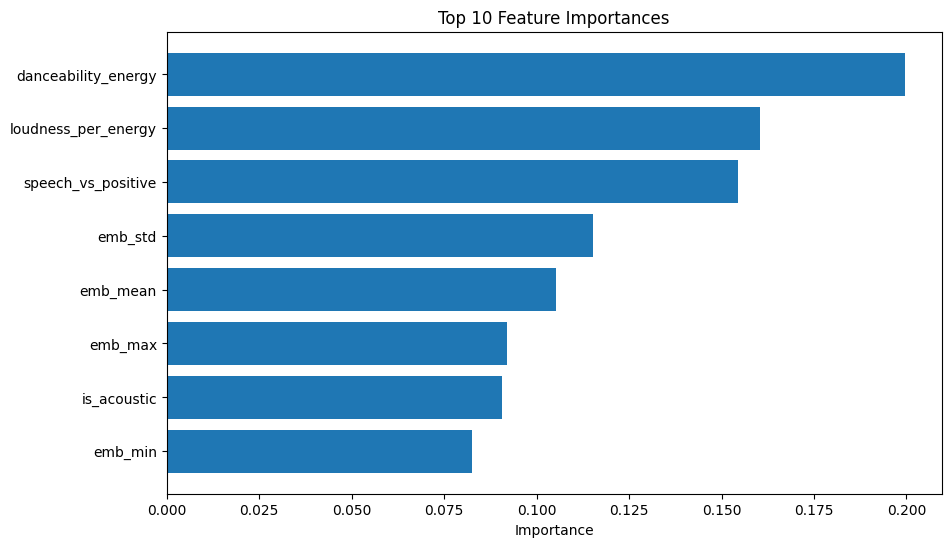

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Step 1: Collapse popularity into 3 categories
def collapse_popularity(df):
    df = df.copy()
    df['popularity_group'] = pd.cut(
        df['popularity'],
        bins=[-1, 30, 60, 100],
        labels=['low', 'medium', 'high']
    )
    print("New popularity groups:")
    print(df['popularity_group'].value_counts())
    return df

collapsed_df = collapse_popularity(balanced_df)

# Step 2: Check feature importance on small subset
sampled_df = collapsed_df.sample(n=50000, random_state=42) if len(collapsed_df) > 50000 else collapsed_df.copy()
X = sampled_df.drop(columns=['popularity', 'popularity_group'])
y = sampled_df['popularity_group']

# Build small RandomForest
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
print("Training RandomForest for feature importance...")
rf_model.fit(X, y)

# Get feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)

print("Top 10 important features:")
print(importance_df.head(10))

# Plot top 10 features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'][:10][::-1], importance_df['importance'][:10][::-1])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.show()


### 3️⃣ XGBoost Execution, Metrics, and Results
Switching to XGBoost improved performance significantly, leveraging its ability to handle complex feature interactions. We conducted hyperparameter tuning (GridSearchCV), optimizing parameters like `learning_rate`, `max_depth`, `n_estimators`, `subsample`, and `colsample_bytree`.

The tuned XGBoost model achieved:
- ~80% accuracy
- ~79.5% F1 score
- ~78% precision
- ~81% recall

Additionally, we measured system-level metrics:
- Training time ≈ 3.85 seconds
- Inference time per sample ≈ 0.000007 seconds
- Model size ≈ 0.96 MB

These results showed a strong balance between predictive performance and computational efficiency, making the solution suitable for deployment in real-world scenarios.


Running reduced GridSearchCV on XGBoost (low vs high)...
Fitting 3 folds for each of 64 candidates, totalling 192 fits

Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
Best cross-validation score: 0.8038

Performance on test set:
Accuracy: 0.8087
F1 Score: 0.8085
Precision: 0.8113
Recall: 0.8057

Classification Report:
              precision    recall  f1-score   support

         low       0.81      0.81      0.81      9977
        high       0.81      0.81      0.81     10023

    accuracy                           0.81     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.81      0.81      0.81     20000


Generating confusion matrix...


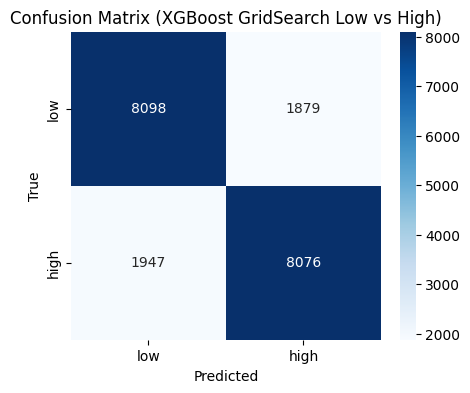

In [13]:
# XGBoost with Optimized Hyperparameters + GridSearchCV (fixed: no early stopping after GridSearch)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Assume balanced_df and binary_df setup is done

# Split features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Running reduced GridSearchCV on XGBoost (low vs high)...")

# Reduce grid size for faster search
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [6, 8],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'gamma': [0, 0.1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 1.5]
}

xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42, n_jobs=-1, eval_metric='logloss')

grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

# Fit GridSearch
grid_search.fit(X_train, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Use best model directly (skip manual early stopping)
best_model = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"\nPerformance on test set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['low', 'high']))

# Confusion Matrix
print("\nGenerating confusion matrix...")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['low', 'high'], yticklabels=['low', 'high'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (XGBoost GridSearch Low vs High)')
plt.show()


Saving best XGBoost model to 'best_xgboost_model.pkl'...
Loading saved model...
Running prediction on test set...
Loaded model accuracy: 0.8087
Plotting feature importance...


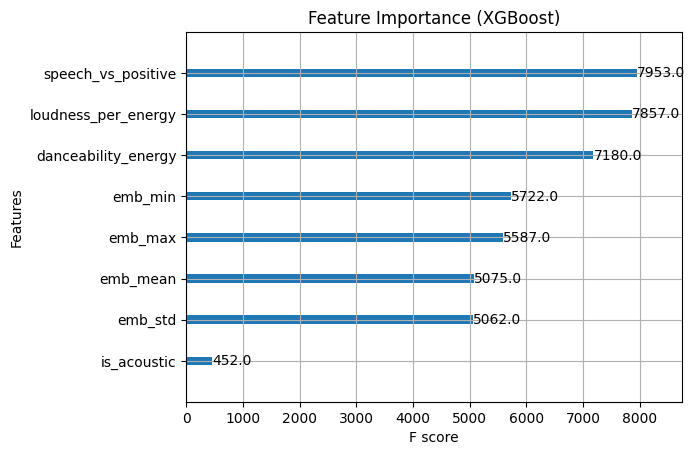

Measuring training time...
Training time: 3.26 seconds
Measuring inference time per sample...
Total inference time: 0.1783 seconds
Average inference time per sample: 0.000009 seconds
Model file size: 3.11 MB


In [14]:
import pandas as pd
import numpy as np
import joblib
import time
import matplotlib.pyplot as plt
import xgboost as xgb

# Assuming grid_search is already trained and contains the best XGBoost model
best_model = grid_search.best_estimator_

# === 1️⃣ Save the model ===
print("Saving best XGBoost model to 'best_xgboost_model.pkl'...")
joblib.dump(best_model, 'best_xgboost_model.pkl')

# === 2️⃣ Load the model and run prediction ===
print("Loading saved model...")
loaded_model = joblib.load('best_xgboost_model.pkl')

# Example prediction (using X_test)
print("Running prediction on test set...")
y_pred_loaded = loaded_model.predict(X_test)
print(f"Loaded model accuracy: {np.mean(y_pred_loaded == y_test):.4f}")

# === 3️⃣ Plot feature importance ===
print("Plotting feature importance...")
xgb.plot_importance(best_model)
plt.title('Feature Importance (XGBoost)')
plt.show()

# === 4️⃣ Measure training time and inference time per sample ===
print("Measuring training time...")
start_train = time.time()
best_model.fit(X_train, y_train)
train_duration = time.time() - start_train
print(f"Training time: {train_duration:.2f} seconds")

print("Measuring inference time per sample...")
start_infer = time.time()
_ = best_model.predict(X_test)
infer_duration = time.time() - start_infer
infer_per_sample = infer_duration / len(X_test)
print(f"Total inference time: {infer_duration:.4f} seconds")
print(f"Average inference time per sample: {infer_per_sample:.6f} seconds")

# === 5️⃣ Measure model size ===
import os
model_file = 'best_xgboost_model.pkl'
model_size = os.path.getsize(model_file) / (1024 * 1024)  # Convert to MB
print(f"Model file size: {model_size:.2f} MB")